# 02 — Trend Analysis: Three-Point Inflation

## Ziel
Dieses Notebook analysiert die zeitliche Entwicklung des Drei-Punkte-Wurfs in der NBA.
Ausgehend von Team-Spiel-Daten werden Kennzahlen auf **Team × Saison** aggregiert,
um langfristige Trends im Wurfvolumen (3PA) und in der Effizienz (3P%) sichtbar zu machen.

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from google.colab import files
uploaded = files.upload()

df = pd.read_csv(
    "/content/nba_master_all_seasons_sorted.csv",
    sep=";",
    decimal=",",
    engine="python"
)

# Prozentspalten sicher numerisch
pct_cols = ["FG%", "3P%", "FT%"]
for c in pct_cols:
    df[c] = pd.to_numeric(df[c].astype(str).str.replace(",", ".", regex=False), errors="coerce")

df.head()

Saving nba_master_all_seasons_sorted.csv to nba_master_all_seasons_sorted (1).csv


,gameid,date,type,teamid,team,home,away,MIN,PTS,FGM,...,DREB,REB,AST,TOV,STL,BLK,PF,+/-,win,season
0,29600001,01.11.96,regular,1610612738,BOS,BOS,CHI,48,98,38,...,22,36,20,18.0,10,2,33,-9.0,0,1997
1,29600001,01.11.96,regular,1610612741,CHI,BOS,CHI,48,107,42,...,29,37,28,19.0,7,8,23,9.0,1,1997
2,29600002,01.11.96,regular,1610612739,CLE,NJN,CLE,48,90,34,...,23,35,16,15.0,11,1,24,13.0,1,1997
3,29600002,01.11.96,regular,1610612751,NJN,NJN,CLE,48,77,23,...,24,35,13,22.0,7,7,19,-13.0,0,1997
4,29600003,01.11.96,regular,1610612749,MIL,PHI,MIL,48,111,38,...,31,50,21,15.0,9,7,30,8.0,1,1997


## Aggregation auf Team × Saison

Da die Rohdaten auf Team × Spiel-Ebene vorliegen, werden sie für die Trendanalyse
auf Team × Saison aggregiert. Dadurch sind Vergleiche zwischen Saisons unabhängig
von Spielanzahl oder Sonderereignissen möglich.

In [11]:
season_team = (
    df.groupby(["season", "teamid", "team"])
      .agg(
          games=("gameid", "nunique"),
          three_pa=("3PA", "sum"),
          three_pm=("3PM", "sum")
      )
      .reset_index()
)

season_team["3PA_per_game"] = season_team["three_pa"] / season_team["games"]
season_team["3P_pct"] = season_team["three_pm"] / season_team["three_pa"]

season_team.head()

,season,teamid,team,games,three_pa,three_pm,3PA_per_game,3P_pct
0,1997,1610612737,ATL,92,2052,728,22.304348,0.354776
1,1997,1610612738,BOS,82,1331,467,16.231707,0.350864
2,1997,1610612739,CLE,82,1284,483,15.658537,0.376168
3,1997,1610612741,CHI,101,1767,639,17.495050,0.361630
4,1997,1610612742,DAL,82,1315,429,16.036585,0.326236


## Ligenweite Entwicklung

Zur Visualisierung des allgemeinen Trends werden die Team-Saison-Werte
auf Ligaebene (Mittelwerte) zusammengefasst.

In [12]:
league_trend = (
    season_team.groupby("season")
    .agg(
        avg_3PA_per_game=("3PA_per_game", "mean"),
        avg_3P_pct=("3P_pct", "mean")
    )
    .reset_index()
)

league_trend.head()

,season,avg_3PA_per_game,avg_3P_pct
0,1997,16.859000,0.358705
1,1998,12.764841,0.343155
2,1999,13.257069,0.334328
3,2000,13.765124,0.352233
4,2001,13.751548,0.351486


## Ligenweite Entwicklung

Zur Visualisierung des allgemeinen Trends werden die Team-Saison-Werte
auf Ligaebene (Mittelwerte) zusammengefasst.

In [13]:
league_trend = (
    season_team.groupby("season")
    .agg(
        avg_3PA_per_game=("3PA_per_game", "mean"),
        avg_3P_pct=("3P_pct", "mean")
    )
    .reset_index()
)

league_trend.head()

,season,avg_3PA_per_game,avg_3P_pct
0,1997,16.859000,0.358705
1,1998,12.764841,0.343155
2,1999,13.257069,0.334328
3,2000,13.765124,0.352233
4,2001,13.751548,0.351486


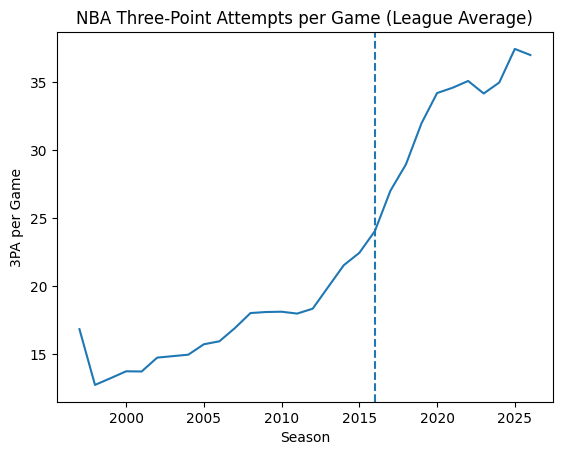

In [14]:
plt.figure()
plt.plot(league_trend["season"], league_trend["avg_3PA_per_game"])
plt.axvline(2016, linestyle="--")  # 2015/16 Saison
plt.xlabel("Season")
plt.ylabel("3PA per Game")
plt.title("NBA Three-Point Attempts per Game (League Average)")
plt.show()

Der Plot zeigt einen starken Anstieg der Dreierversuche pro Spiel,
insbesondere ab der Saison 2015/16, die häufig als Beginn der modernen
Drei-Punkte-Ära bezeichnet wird.

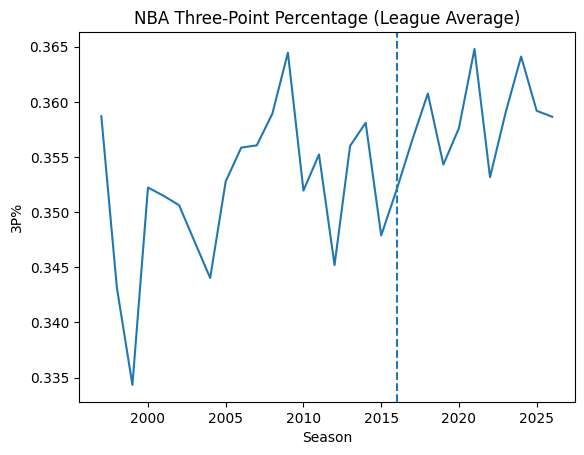

In [15]:
plt.figure()
plt.plot(league_trend["season"], league_trend["avg_3P_pct"])
plt.axvline(2016, linestyle="--")
plt.xlabel("Season")
plt.ylabel("3P%")
plt.title("NBA Three-Point Percentage (League Average)")
plt.show()

Trotz des stark steigenden Wurfvolumens bleibt die durchschnittliche
Drei-Punkte-Quote über die Zeit relativ stabil.
Dies deutet darauf hin, dass der Volumenanstieg nicht automatisch mit
einem Effizienzverlust einhergeht.

## Zwischenfazit

- Das Volumen an Dreierversuchen pro Spiel ist seit 1996 stark gestiegen.
- Ein besonders deutlicher Anstieg ist ab der Saison 2015/16 zu beobachten.
- Die durchschnittliche Drei-Punkte-Quote bleibt über den Zeitraum hinweg
  vergleichsweise stabil.

Diese deskriptiven Ergebnisse bilden die Grundlage für die anschließenden
statistischen Hypothesentests.